### importing of relevant packages

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### reading csv and txt files into relevant dataframes

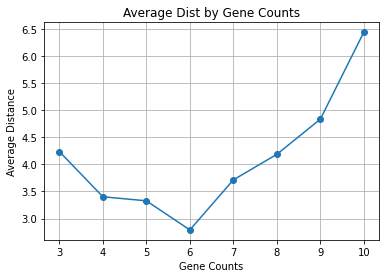

In [7]:
txt_file = "analysis data/genecount_test_summary.txt"
gene_df = pd.read_csv(txt_file, sep = " ", names = ["col1", "run", "col2", "gene_count", "col3", "avg_dist"])
gene_df = gene_df.drop(columns = ["col1", "col2", "col3"])

# storing data to their relative columns
gene_df["run"] = gene_df["run"].astype(int)
gene_df["gene_count"] = gene_df["gene_count"].astype(int)
gene_df["avg_dist"] = gene_df["avg_dist"].astype(float)

# grouping by gene count
avg_dist_by_gene = gene_df.groupby("gene_count")["avg_dist"].mean()

# plotting data
plt.figure(figsize = (6, 4))
plt.plot(avg_dist_by_gene.index, avg_dist_by_gene.values, marker = "o")
# labelling axes and title
plt.xlabel("Gene Counts")
plt.ylabel("Average Distance")
plt.title("Average Dist by Gene Counts")

# showing plot
plt.grid(True)
plt.show()

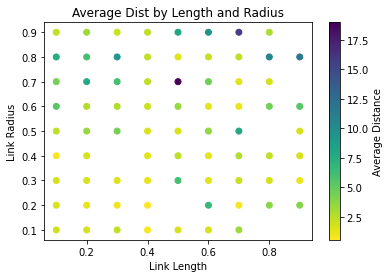

In [38]:
txt_file = "analysis data/len_rad_test_summary.txt"
len_rad_df = pd.read_csv(txt_file, sep = "\s+", names = ["col1", "length", "col2", "radius", "col3", "avg_dist"])
len_rad_df = len_rad_df.drop(columns = ["col1", "col2", "col3"])

# storing data to their relative columns
len_rad_df["length"] = len_rad_df["length"].astype(float)
len_rad_df["radius"] = len_rad_df["radius"].astype(float)
len_rad_df["avg_dist"] = len_rad_df["avg_dist"].astype(float)

# grouping by len_rad count
avg_dist_by_len_rad = len_rad_df.groupby(["length", "radius"])["avg_dist"].mean().reset_index()

# plotting data using scatterplot to keep each combination
plt.figure(figsize = (6, 4))
sc = plt.scatter(avg_dist_by_len_rad["length"], avg_dist_by_len_rad["radius"], c = avg_dist_by_len_rad["avg_dist"], cmap = "viridis_r", marker = "o")
plt.colorbar(sc, label = "Average Distance")

# labelling axes and title
plt.xlabel("Link Length")
plt.ylabel("Link Radius")
plt.title("Average Dist by Length and Radius")

# showing plot
plt.show()

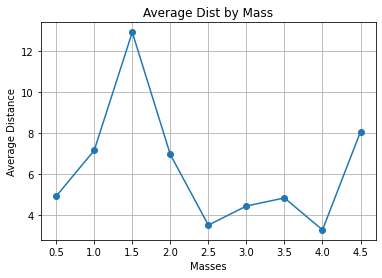

In [40]:
txt_file = "analysis data/mass_test_summary.txt"
mass_df = pd.read_csv(txt_file, sep = " ", names = ["col1", "run", "col2", "mass", "col3", "avg_dist"])
mass_df = mass_df.drop(columns = ["col1", "col2", "col3"])

# storing data to their relative columns
mass_df["run"] = mass_df["run"].astype(int)
mass_df["mass"] = mass_df["mass"].astype(float)
mass_df["avg_dist"] = mass_df["avg_dist"].astype(float)

# grouping by mass
avg_dist_by_mass = mass_df.groupby("mass")["avg_dist"].mean()

# plotting data
plt.figure(figsize = (6, 4))
plt.plot(avg_dist_by_mass.index, avg_dist_by_mass.values, marker = "o")
# labelling axes and title
plt.xlabel("Masses")
plt.ylabel("Average Distance")
plt.title("Average Dist by Mass")

# showing plot
plt.grid(True)
plt.show()

In [57]:
directory = "samplers/pop gen modifiers"

# initialising list to store data
pop_sizes = []
generations = []
max_fitness = []
mean_fitness = []

# accessing the files needed through iteration
ranges = [50, 100, 150]

for pop in ranges:
    for gen in ranges:
        file_name = f"pop{pop}_gen{gen}_summary.csv"
        file_path = os.path.join(directory, file_name)
        
        # reading header to get pop_size and gen_count
        with open(file_path, "r") as f:
            header = f.readline().strip()
            pop_size = int(header.split()[1])
            generation = int(header.split()[5])
            pop_sizes.append(pop_size)
            generations.append(generation)
            
        # getting the last generation to get max and mean fitness
        last_iteration = pd.read_csv(file_path, sep = " ", skiprows = [0], header = None, engine = "python").iloc[-1]
        max_fit = float(last_iteration[3])
        mean_fit = float(last_iteration[5])
        max_fitness.append(max_fit)
        mean_fitness.append(mean_fit)

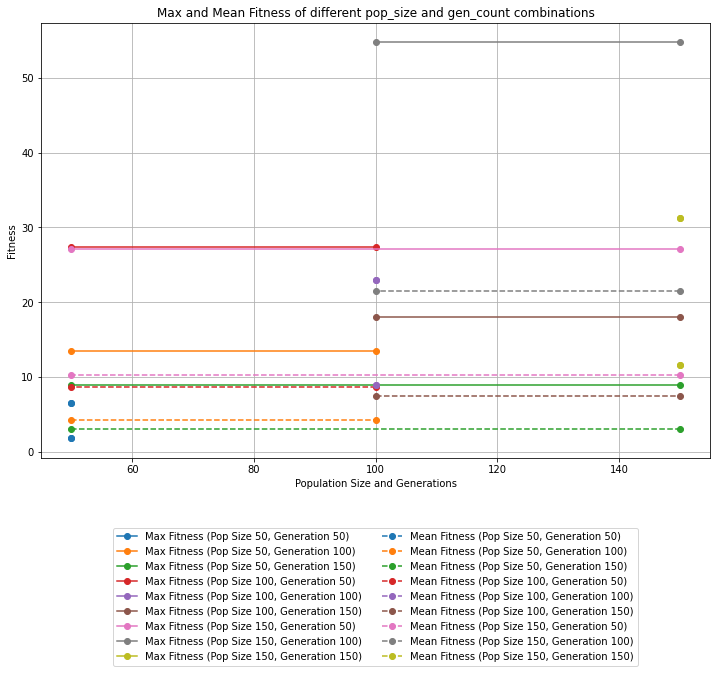

In [65]:
# plotting fitnesses
plt.figure(figsize = (12, 8))
# defining distinct colours using colour map
colours = plt.cm.tab10.colors

# plotting max fitness
for i in range(len(pop_sizes)):
    plt.plot([pop_sizes[i], generations[i]],[max_fitness[i], max_fitness[i]],
             marker = "o", color = colours[i], linestyle = "-",
             label = f"Max Fitness (Pop Size {pop_sizes[i]}, Generation {generations[i]})")

# plotting mean fitness
for i in range(len(pop_sizes)):
    plt.plot([pop_sizes[i], generations[i]],[mean_fitness[i], mean_fitness[i]],
             marker = "o", color = colours[i], linestyle = "--",
             label = f"Mean Fitness (Pop Size {pop_sizes[i]}, Generation {generations[i]})")

# labels and titles
plt.xlabel("Population Size and Generations")
plt.ylabel("Fitness")
plt.title("Max and Mean Fitness of different pop_size and gen_count combinations")
plt.legend(loc = "upper center", bbox_to_anchor = (0.5, -0.15), ncol = 2)
plt.grid(True)
plt.show()